#Atividade
 
 
*   Entregar um documento COLAB do Google com um estudo dos grupos encontrados nos dados IRIS e WINE usando kMeans para vários valores de k. Comente qual o melhor valor de k para cada base.

#### 1.   *Importações dos módulos gerais*

    * Aqui serão importados o numpy, o pandas e o matplotlib/seaborn para plots




In [1]:
# This is not strictly for a Python rather. 
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
 
sns.set()                         #Configura os plots do matplotlib para terem os mesmos estilos do seaborn
sns.set_style("whitegrid")        #Alterando o estilo do plot para melhor vizualização no colab (Tema escuro fica ruim de ver o fundo)

In [3]:
from sklearn.cluster import KMeans

#### 2.   *Leitura do Dataset "Iris"*
      *   O dataset será retirado de um repositório pessoal do GITHUB
      *   Serve para classificar qual o tipo de iris que uma flor possue
      *   O dataset conta com:
            1.   4 features: "SepalLengthCm", "SepalWidthCm", "PetalLengthCm" e "PetalWidthCm"
            2.   1 terget dividido em 3 classes: "Iris-setosa", "Iris-versicolor" e "Iris-virginica"




In [4]:
iris = pd.read_csv('https://raw.githubusercontent.com/Berawecker/Datasets/main/Iris.csv')
iris = iris.drop(["Id"], axis = 1)
 
iris

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


#### 3.   *Leitura do Dataset "Wine"*

      *   O dataset será retirado de um repositório pessoal do GITHUB
      *   Serve para classificar a tipo de vinho referente a sua qualidade
      *   O dataset conta com:
            1.   13 features: variando entre "Alcohol" até "Proline"
            2.   1 terget dividido em 3 classes: "1", "2" e "3". Será alterado para "Class 1", "Class 2" e "Class 3" respectivamente para melhorar a visualização



In [5]:
wine = pd.read_csv('https://raw.githubusercontent.com/Berawecker/Datasets/main/Wine%20UCI.csv')  
wine.replace({'Label' : { 1.0 : "Class 1", 2.0 : "Class 2", 3.0 : "Class 3" }}, inplace = True)
 
wine

,Label,Alcohol,Malic Acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,Class 1,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,Class 1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,Class 1,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,Class 1,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,Class 1,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174,Class 3,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,Class 3,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,Class 3,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0
177,Class 3,14.13,4.10,2.74,24.5,96.0,2.05,0.76,0.56,1.35,9.20,0.61,1.60,560.0


A única limpeza necessária no dataset é a remoção da ultima linha que é apenas composta por dados faltantes.

In [20]:
wine = wine.drop(178, axis = 0)
wine

,Label,Alcohol,Malic Acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,Class 1,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,Class 1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,Class 1,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,Class 1,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,Class 1,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,Class 3,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,Class 3,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,Class 3,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,Class 3,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


#### 4.   Gráficos dos dados inalterados

    * Contabilização das classes

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Wine dataset')

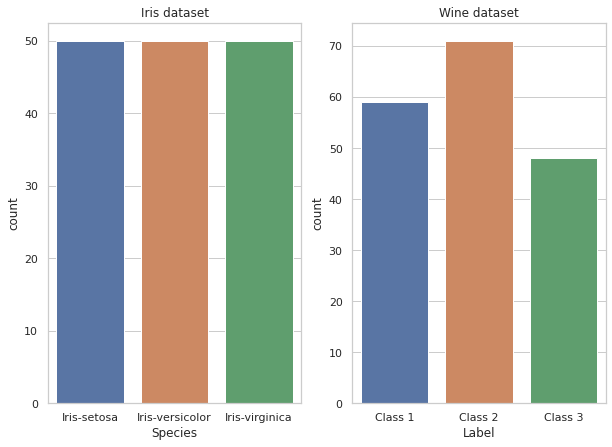

In [6]:
fig, ax = plt.subplots(1,2, figsize=(10,7))
sns.countplot(iris['Species'], ax=ax[0]).set_title("Iris dataset")
sns.countplot(wine['Label'], ax=ax[1]).set_title("Wine dataset")

Atravéz deste plot é possível perceber que o dataset IRIS possui classes balanceadas e o dataset WINE possui classes desbalanceadas.

    * Cálculo e plot da matriz de correlação

Text(0.5, 1.0, 'Matriz de correlação do Iris')

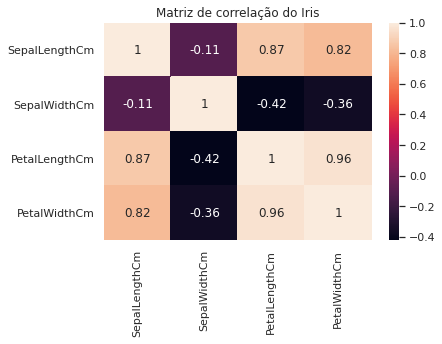

In [7]:
sns.heatmap(iris.corr(), color = 'k', annot = True).set_title("Matriz de correlação do Iris")

É interessante perceber que 3 das 4 variáveis possuem altos valores de correlação positiva e que "SepalWidthCm" acaba por ser a variável que mais transmite informação importante para o classificador devido ao seu baixo ou médio valor de correlação. Tambem percebe-se que esta variável possui correlação negativa com todas as outras variáveis.

Text(0.5, 1.0, 'Matriz de correlação do Wine')

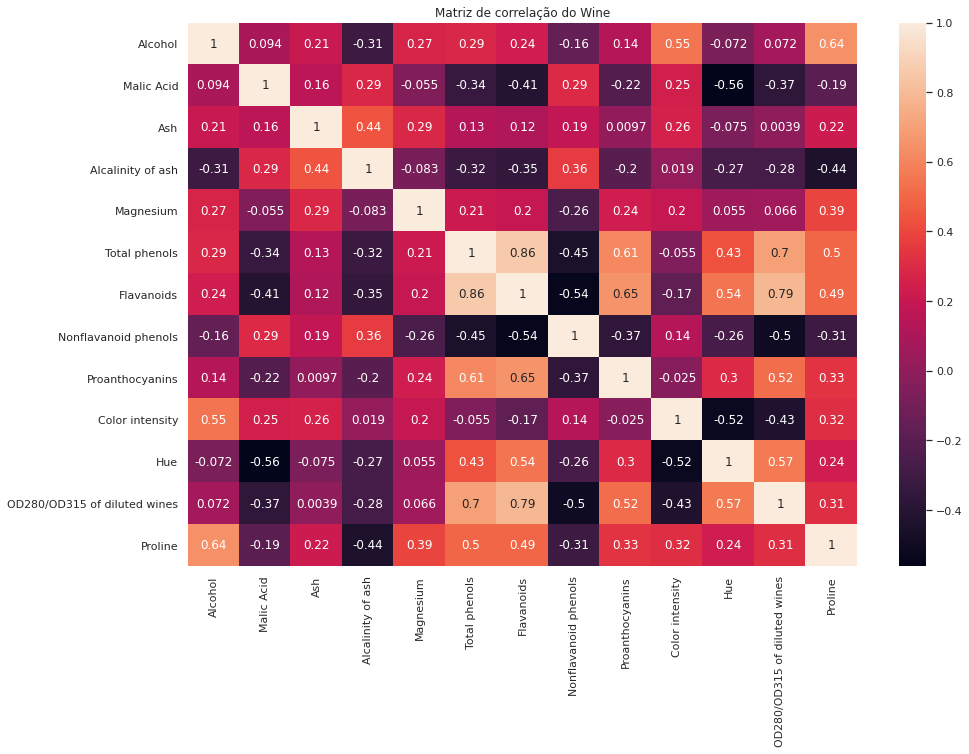

In [8]:
plt.figure(figsize = (15,10))
sns.set(font_scale = 1)
sns.heatmap(wine.corr(), color = 'k', annot = True).set_title("Matriz de correlação do Wine")

É possivel ver que alguns dados possuem grandes correlações positiva com outras variáveis ("Total phenols" e "Flavanoids" por exemplo), algumas negativas e alguns dados possuem correlação quase nula com outros.

    * Pairplot do dataset IRIS para melhor visualização das caracteristicas de correlação

<Figure size 7200x4800 with 0 Axes>

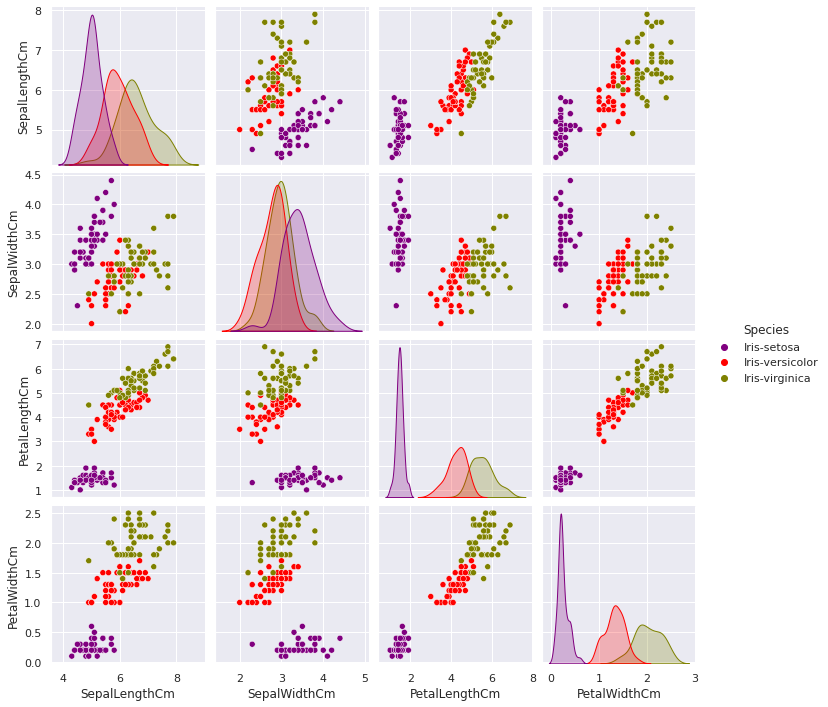

In [9]:
plt.figure(dpi = 1200)
sns.pairplot(iris, hue = "Species", palette = "brg")

Atravéz do pairplot, é possível perceber a correlação mostrada na matriz de correlação do iris como no caso do gráfico de "PetalLengthCm" e do "PetalWidthCm" que possui um comportamento bastante linear devida a alta correlação ou como no gráfico do "SepalWidthCm" e do "SepalLengthCm" que possui um gráfico mais disperso devido a baixa correlação.

    * Pairplot do dataset WINE para melhor visualização das caracteristicas de correlação dos atributos

In [10]:
sns.set(font_scale = 1.05)
sns.pairplot(wine, hue = "Label", palette = "brg")

Output hidden; open in https://colab.research.google.com to view.

Aqui é possivel ver de forma mais gráfica as correlações mostradas no heatmap do wine. É possivel ver mais nitidamente a relação linear que "Total phenols" e "Flavanoids" possue e a pouca correlação que muitos dados possuem entre si como "Alcalinity of ash" e "Magnesium"

#### 5. K-Means Clustering

    * Separação dos dados

In [12]:
f_iris = iris.iloc[:, :4].values
t_iris = iris.iloc[:, 4].values

In [22]:
f_wine = wine.iloc[:, 1:]
t_wine = wine.iloc[:, 0].values

    * Kmeans com os dados da IRIS

Text(0.5, 1.0, 'Elbow Method - Iris Dataset')

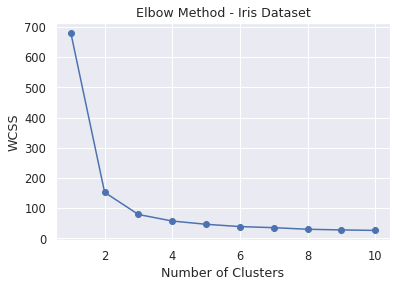

In [30]:
wcss_1 = []

for i in range(1, 11):
  kmeans_iris = KMeans(n_clusters = i)
  kmeans_iris.fit(f_iris)
  wcss_1.append(kmeans_iris.inertia_)

plt.plot(range(1,11), wcss_1, marker = "o")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.title("Elbow Method - Iris Dataset")

Observando o gráfico acima, se percebe que o "k" com valor de 2 já possue uma grande diferença do k = 1 (pior caso). mas k = 3 está mais porximo da zona em que não há uma variação tão grande entre os resultados então o "k" escolhido será 3

    * Kmeans com os dados da WINE

Text(0.5, 1.0, 'Elbow Method - Wine Dataset')

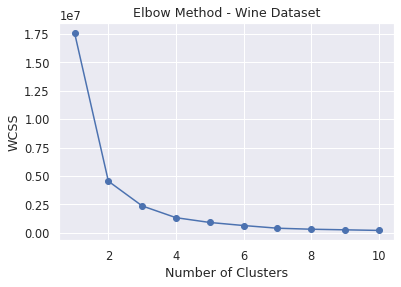

In [31]:
wcss_2 = []

for i in range(1, 11):
  kmeans_wine = KMeans(n_clusters = i)
  kmeans_wine.fit(f_wine)
  wcss_2.append(kmeans_wine.inertia_)

plt.plot(range(1,11), wcss_2, marker = "o")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.title("Elbow Method - Wine Dataset")